# **Email/SMS spam classifier**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
File_path = '/content/SMS spam data.csv'

# Try encode with the help of 'ISO-8859-1'
Data = pd.read_csv(File_path,encoding = 'ISO-8859-1')
Data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
Data.shape

(5572, 5)

## Project Path

In [ ]:
# 1. Data cleaning
# 2. EDA (Exporatory data analysis)
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Web app
# 8. Deploy model on streamlit

# Data cleaning

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop last 3 columns
Data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [ ]:
Data.sample(5)

,v1,v2
1709,ham,U meet other fren dun wan meet me ah... Muz b ...
5255,ham,Ok... Sweet dreams...
4398,ham,Yes just finished watching days of our lives. ...
2281,ham,"I hav almost reached. Call, i m unable to conn..."
4296,spam,thesmszone.com lets you send free anonymous an...


In [ ]:
# Rename columns
Data.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)

In [ ]:
Data.sample(5)

,Target,Text
5408,ham,... Are you in the pub?
4412,ham,Sad story of a Man - Last week was my b'day. M...
387,ham,Mm that time you dont like fun
1268,spam,Can U get 2 phone NOW? I wanna chat 2 set up m...
3099,ham,Tessy..pls do me a favor. Pls convey my birthd...


In [ ]:
# Apply labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Data['Target'] = encoder.fit_transform(Data['Target'])

In [ ]:
Data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Check missing values
Data.isnull().sum()

,0
Target,0
Text,0


In [ ]:
# Check for duplicate values
Data.duplicated().sum()

np.int64(403)

In [ ]:
# Remove duplicate values
Data = Data.drop_duplicates(keep = 'first')

In [ ]:
Data.duplicated().sum()

np.int64(0)

In [ ]:
Data.shape

(5169, 2)

# EDA (Exploratory Data Analysis)

In [ ]:
Data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
# ham = 0
# spam = 1
Data['Target'].value_counts()

,count
Target,
0,4516
1,653


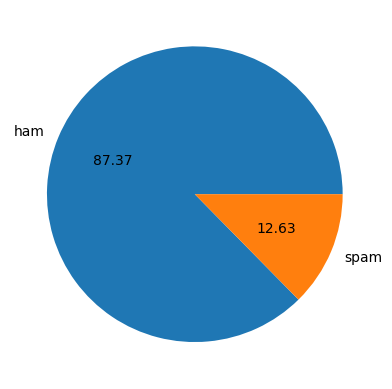

In [ ]:
import matplotlib.pyplot as plt

plt.pie(Data['Target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

#### We get ham = 87.37% and spam = 12.63% so, based on this condition data is imbalanced.

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
Data['Num_characters'] = Data['Text'].apply(len)

In [ ]:
Data.head()

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Fetch num of words
Data['Num_words'] = Data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
Data.head()

,Target,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Fetch sentences
Data['Num_sentences'] = Data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
Data.head()

,Target,Text,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Check
Data[['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Seperate analysis of 'Target'[ham, spam]

# ham
Data[Data['Target'] == 0][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam
Data[Data['Target'] == 1][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

### Num_characters

<Axes: xlabel='Num_characters', ylabel='Count'>

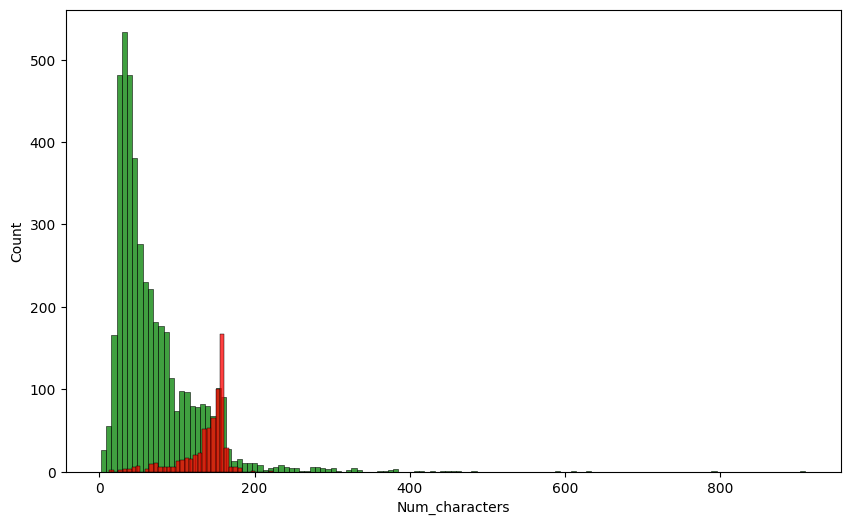

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(Data[Data['Target'] == 0]['Num_characters'], color = 'green') #ham
sns.histplot(Data[Data['Target'] == 1]['Num_characters'], color = 'red') #spam

### Num_words

<Axes: xlabel='Num_words', ylabel='Count'>

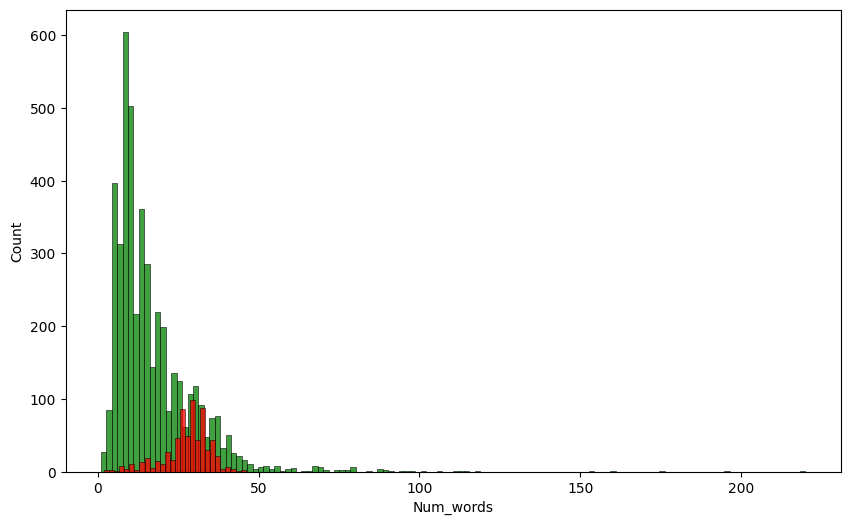

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(Data[Data['Target'] == 0]['Num_words'], color = 'green') #ham
sns.histplot(Data[Data['Target'] == 1]['Num_words'], color = 'red') #spam

### Num_sentences

<Axes: xlabel='Num_sentences', ylabel='Count'>

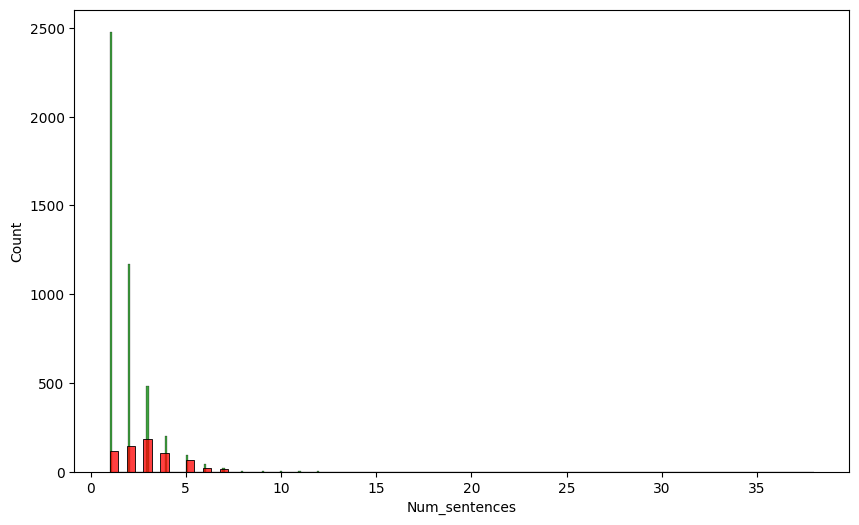

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(Data[Data['Target'] == 0]['Num_sentences'], color = 'green') #ham
sns.histplot(Data[Data['Target'] == 1]['Num_sentences'], color = 'red') #spam

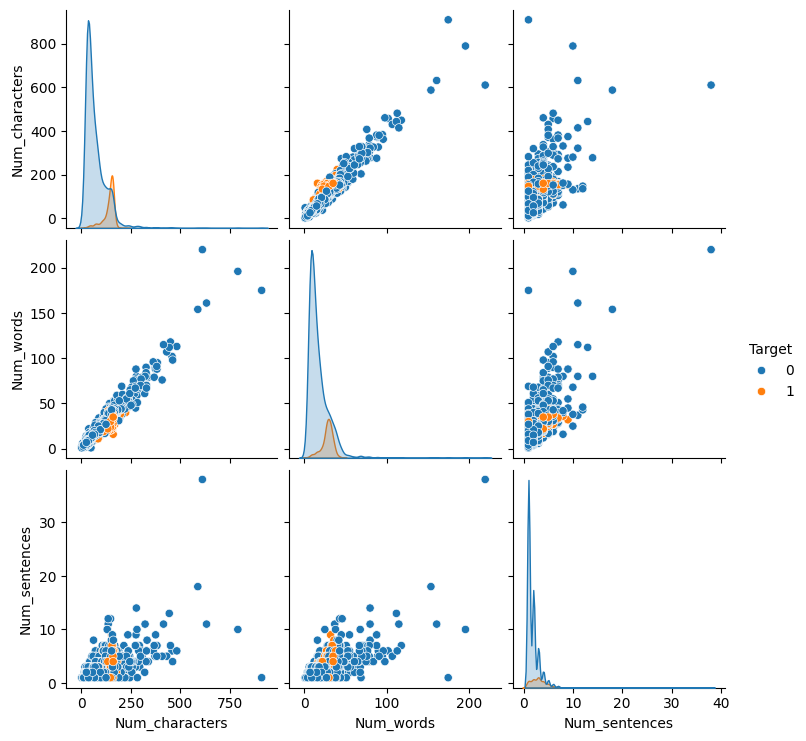

In [ ]:
# Check the relationship
sns.pairplot(Data, hue = 'Target')

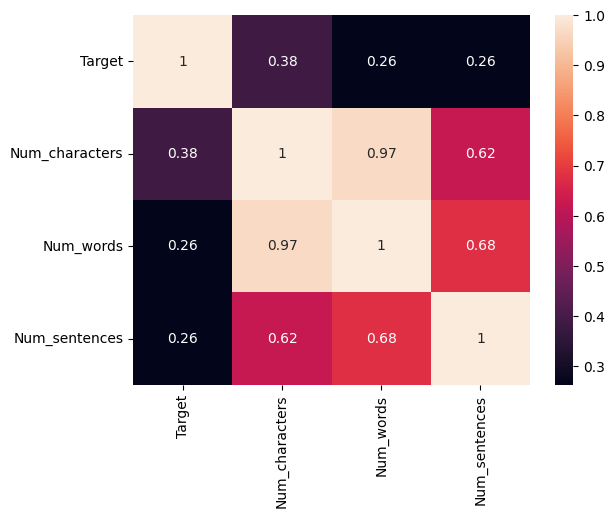

In [ ]:
# Check correlation
sns.heatmap(Data[['Target','Num_characters','Num_words','Num_sentences']].corr(), annot = True)
plt.xticks(rotation = 'vertical')
plt.show()

# Data preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming (reduce word to their base form)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
# Punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# stemming - bring word into base root form
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Having')

'have'

In [ ]:
def transform_text(text):
  # Lower case
  text = text.lower()

  # Tokenization
  text = nltk.word_tokenize(text)

  # Removing special characters
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  # Removing stop words and punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  #Stemming
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [ ]:
# Check
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
# Apply transform_text function
Data['Transformed_text'] = Data['Text'].apply(transform_text)

In [ ]:
Data.head()

,Target,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Creating Word cloud


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

#### Spam messages

In [ ]:
spam = wc.generate(Data[Data['Target'] == 1]['Transformed_text'].str.cat(sep = " "))

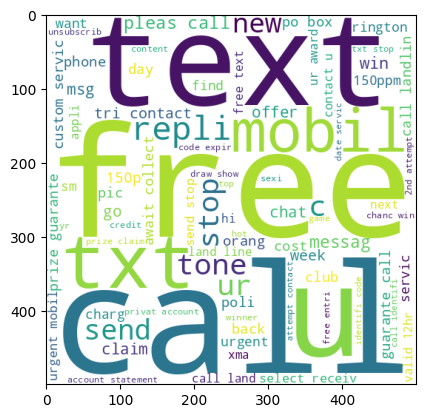

In [ ]:
plt.imshow(spam)

#### Ham messages

In [ ]:
Ham_wc = wc.generate(Data[Data['Target'] == 0]['Transformed_text'].str.cat(sep = " "))

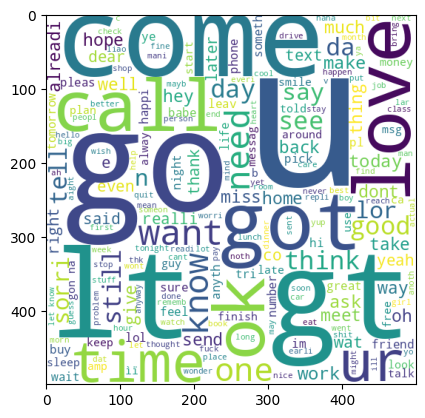

In [ ]:
plt.imshow(Ham_wc)

#### Spam wordings

In [ ]:
spam_corpus = []
for msg in Data[Data['Target'] == 1]['Transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
df = pd.DataFrame(Counter(spam_corpus).most_common(30))
df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


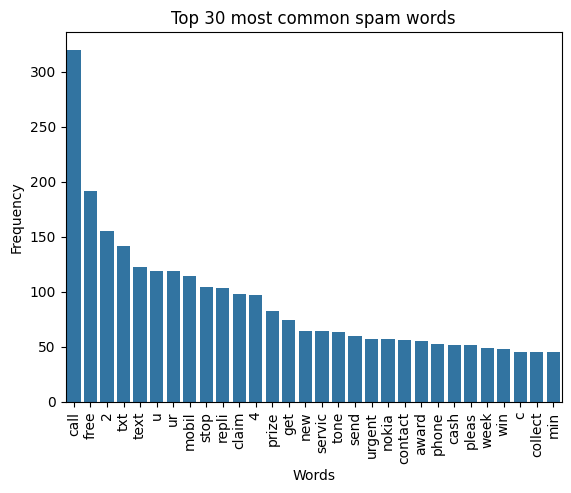

In [ ]:
# Plot spam most common wordings
sns.barplot(x = df[0], y = df[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 most common spam words')
plt.show()

#### Ham wordings

In [ ]:
ham_corpus = []
for msg in Data[Data['Target'] == 0]['Transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
df = pd.DataFrame(Counter(ham_corpus).most_common(30))
df

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


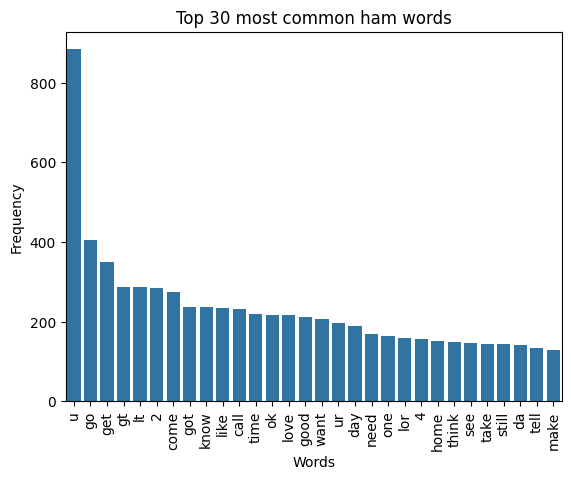

In [ ]:
# Plot ham mostcommon wordings
sns.barplot(x = df[0], y = df[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 most common ham words')
plt.show()

# Model Building

### Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(Data['Transformed_text']).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y = Data['Target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
Gau = GaussianNB()
Mul = MultinomialNB()
Ber = BernoulliNB()

In [ ]:
# GaussianNB
Gau.fit(X_train, y_train)
y_pred_Gau = Gau.predict(X_test)
print('Accuracy score:- ',accuracy_score(y_test, y_pred_Gau))
print('Confusion matric:- ', confusion_matrix(y_test, y_pred_Gau))
print('Precision score:- ', precision_score(y_test, y_pred_Gau))

Accuracy score:-  0.8800773694390716
Confusion matric:-  [[792 104]
 [ 20 118]]
Precision score:-  0.5315315315315315


In [ ]:
# MultinomialNB
Mul.fit(X_train, y_train)
y_pred_Mul = Mul.predict(X_test)
print('Accuracy score:- ',accuracy_score(y_test, y_pred_Mul))
print('Confusion matric:- ', confusion_matrix(y_test, y_pred_Mul))
print('Precision score:- ', precision_score(y_test, y_pred_Mul))

Accuracy score:-  0.9642166344294004
Confusion matric:-  [[871  25]
 [ 12 126]]
Precision score:-  0.8344370860927153


In [ ]:
# BernoulliNB
Ber.fit(X_train, y_train)
y_pred_Ber = Ber.predict(X_test)
print('Accuracy score:- ',accuracy_score(y_test, y_pred_Ber))
print('Confusion matric:- ', confusion_matrix(y_test, y_pred_Ber))
print('Precision score:- ', precision_score(y_test, y_pred_Ber))

Accuracy score:-  0.9700193423597679
Confusion matric:-  [[893   3]
 [ 28 110]]
Precision score:-  0.9734513274336283


### Using TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(Data['Transformed_text']).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y = Data['Target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
Gau = GaussianNB()
Mul = MultinomialNB()
Ber = BernoulliNB()

In [ ]:
# GaussianNB
Gau.fit(X_train, y_train)
y_pred_Gau = Gau.predict(X_test)
print('Accuracy score:- ',accuracy_score(y_test, y_pred_Gau))
print('Confusion matric:- ', confusion_matrix(y_test, y_pred_Gau))
print('Precision score:- ', precision_score(y_test, y_pred_Gau))

Accuracy score:-  0.8762088974854932
Confusion matric:-  [[793 103]
 [ 25 113]]
Precision score:-  0.5231481481481481


In [ ]:
# MultinomialNB
Mul.fit(X_train, y_train)
y_pred_Mul = Mul.predict(X_test)
print('Accuracy score:- ',accuracy_score(y_test, y_pred_Mul))
print('Confusion matric:- ', confusion_matrix(y_test, y_pred_Mul))
print('Precision score:- ', precision_score(y_test, y_pred_Mul))

Accuracy score:-  0.9593810444874274
Confusion matric:-  [[896   0]
 [ 42  96]]
Precision score:-  1.0


In [ ]:
# BernoulliNB
Ber.fit(X_train, y_train)
y_pred_Ber = Ber.predict(X_test)
print('Accuracy score:- ',accuracy_score(y_test, y_pred_Ber))
print('Confusion matric:- ', confusion_matrix(y_test, y_pred_Ber))
print('Precision score:- ', precision_score(y_test, y_pred_Ber))

Accuracy score:-  0.9700193423597679
Confusion matric:-  [[893   3]
 [ 28 110]]
Precision score:-  0.9734513274336283


- We can choose tfidf ----> MultinomialNB

### Save a model and vectorizer

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(Mul, open('model.pkl','wb'))